<a href="https://colab.research.google.com/github/RupamManna68/ML/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn import metrics

In [2]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [6]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [9]:
house_price_df = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [10]:
print(house_price_df)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]


In [11]:
house_price_target = pd.DataFrame(house_price_dataset.target, columns = house_price_dataset.target_names)

In [12]:
print(house_price_target)

       MedHouseVal
0            4.526
1            3.585
2            3.521
3            3.413
4            3.422
...            ...
20635        0.781
20636        0.771
20637        0.923
20638        0.847
20639        0.894

[20640 rows x 1 columns]


In [13]:
house_price_df = pd.concat([house_price_df, house_price_target], axis = 1)

In [14]:
print(house_price_df)

       MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0      8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1      8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2      7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3      5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4      3.8462      52.0  6.281853  ...     37.85    -122.25        3.422
...       ...       ...       ...  ...       ...        ...          ...
20635  1.5603      25.0  5.045455  ...     39.48    -121.09        0.781
20636  2.5568      18.0  6.114035  ...     39.49    -121.21        0.771
20637  1.7000      17.0  5.205543  ...     39.43    -121.22        0.923
20638  1.8672      18.0  5.329513  ...     39.43    -121.32        0.847
20639  2.3886      16.0  5.254717  ...     39.37    -121.24        0.894

[20640 rows x 9 columns]


In [15]:
house_price_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
house_price_df.shape

(20640, 9)

In [18]:
house_price_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [19]:
house_price_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
correlation = house_price_df.corr()

<Axes: >

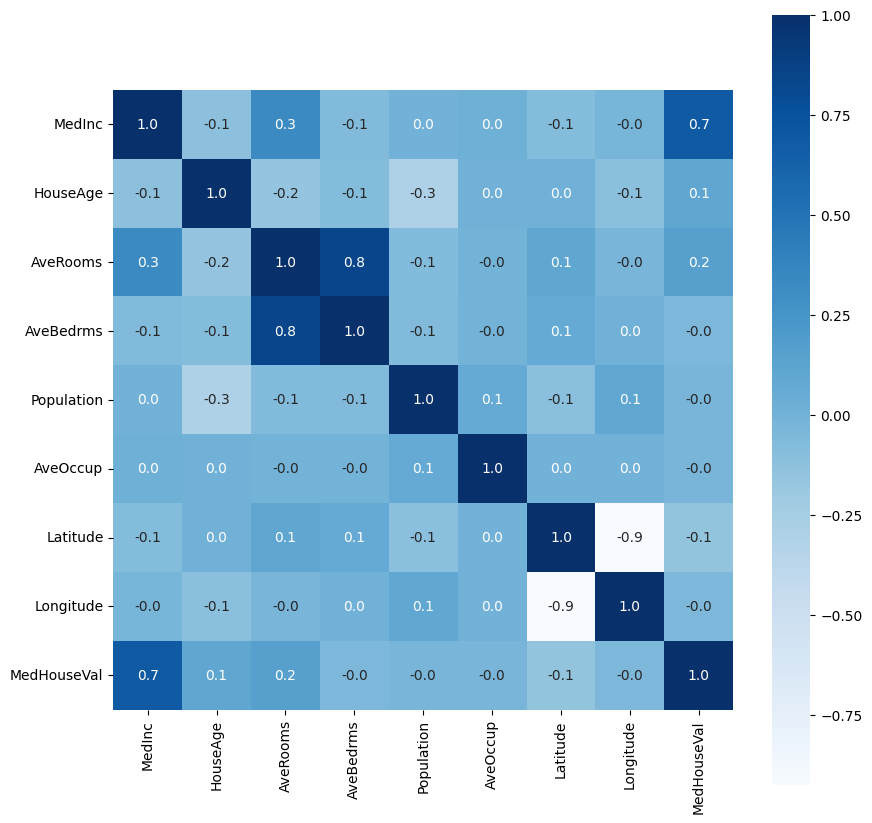

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,annot=True,cmap='Blues',fmt='.1f',linecolor='Black',square=True)

In [23]:
X = house_price_df.drop(columns='MedHouseVal',axis=1)
Y = house_price_df['MedHouseVal']

In [24]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
Y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
training_data_prediction = model.predict(X_train)

In [32]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [33]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
score_3 = metrics.mean_squared_error(Y_train, training_data_prediction)
print(score_1, score_2, score_3)

0.943650140819218 0.1933648700612105 0.0748112971690747


In [34]:
test_prediction = model.predict(X_test)

In [35]:
score_1 = metrics.r2_score(Y_test, test_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_prediction)
score_3 = metrics.mean_squared_error(Y_test, test_prediction)
print(score_1, score_2, score_3)

0.8338000331788725 0.3108631800268186 0.22387540906811954


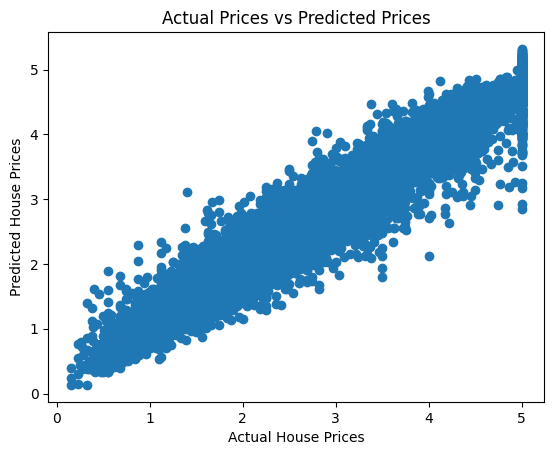

In [36]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

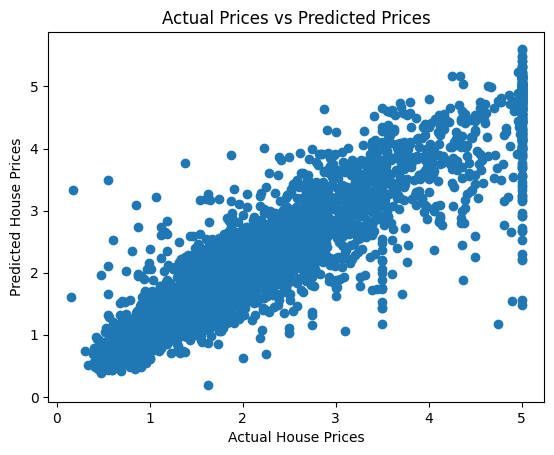

In [37]:
plt.scatter(Y_test, test_prediction)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()